<a href="https://colab.research.google.com/github/Snigdha-Pothuri/python_projects/blob/main/project_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving escape.csv to escape.csv


In [ ]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("escape.csv")
velocity=df["Velocity"].tolist()
escape=df["Escaped"].tolist()
figure=px.scatter(df,x=velocity,y=escape)
figure.show()

In [ ]:
import numpy as np
m,c=np.polyfit(velocity,escape,1)
y=[]
for x in velocity:
  y_value=m*x+c 
  y.append(y_value)
figure=px.scatter(x=velocity,y=escape)
figure.update_layout(shapes=[ 
 dict(
     type="line",
      y0=min(escape),y1=max(escape),
      x0=min(velocity),x1=max(velocity)
 )                             
]) 
figure.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



TypeError: ignored

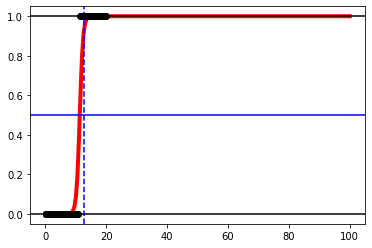

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
X=np.reshape(velocity,(len(velocity),1))
Y=np.reshape(escape,(len(escape),1))
lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)
def model(x):
  return 1/(1+np.exp(-x))
xtest=np.linspace(0,100,200)
chances=model(xtest*lr.coef_+lr.intercept_).ravel()
plt.plot(xtest,chances,color="red",linewidth=4)
plt.axhline(y=0,color="k",linestyle="-")
plt.axhline(y=1,color="k",linestyle="-")
plt.axhline(y=0.5,color="b",linestyle="-")
plt.axvline(x=xtest[25],color="b",linestyle="--")
plt.xlim(0,100)
plt.show()

In [ ]:
velocity = float(input("Enter the velocity:- ")) 
escape = model(velocity * lr.coef_ + lr.intercept_).ravel()[0] 
if escape <= 0.01: 
 print("The object will not escape the orbit")
elif escape >= 1: 
  print("The object will escape the orbit")
elif escape < 0.5: 
  print("The object might not escape the orbit") 
else: 
  print("The object might escape the orbit")